# Predicting House Prices

## Dataset
The dataset comprises house sale prices for King County, encompassing Seattle, covering sales from May 2014 to May 2015.






In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st

In [76]:
df_USA = pd.read_csv("kc_house_data.csv")

In [77]:
print(df_USA.shape)
print(df_USA.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [78]:
print(df_USA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [79]:
print(df_USA.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

C:\Users\abudh\AppData\Local\Temp\ipykernel_20364\1135595489.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_USA['price'])
C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


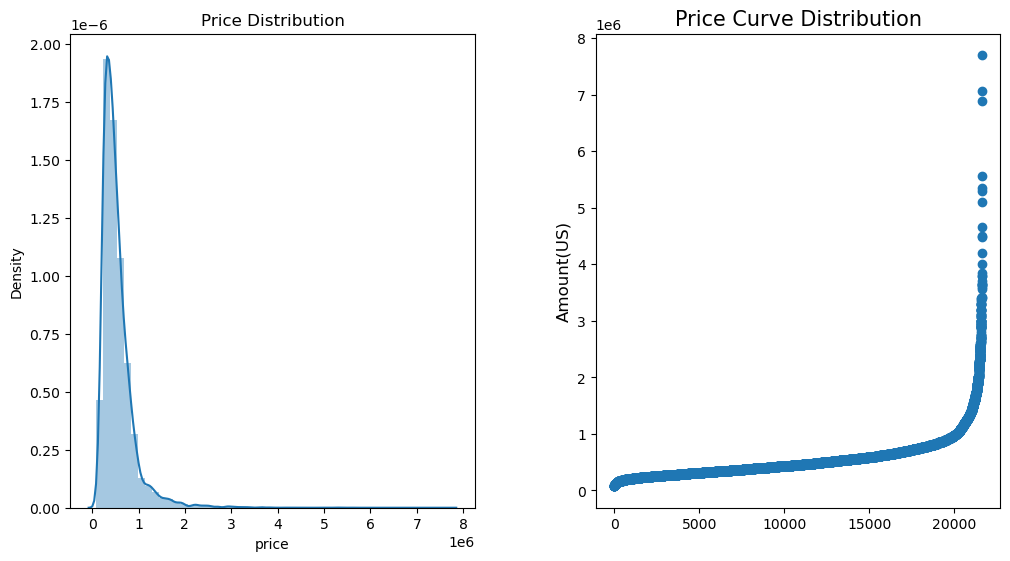

In [80]:
#Price
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.title ("Price Distribution")
sns.distplot(df_USA['price'])


plt.subplot(122)
g1 = plt.scatter(range(df_USA.shape[0]),np.sort(df_USA.price.values))
g1 = plt.title("Price Curve Distribution", fontsize = 15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Amount(US)", fontsize =12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5, top = 0.9)
plt.show()

In [84]:
print("Price Min: ", df_USA['price'].min())
print("Price Mean: ", df_USA['price'].mean())
print("Price Median: ", df_USA['price'].median())
print("Price Max: ", df_USA['price'].max())
print("Price std: ", df_USA['price'].std())


Price Min:  75000.0
Price Mean:  540088.1417665294
Price Median:  450000.0
Price Max:  7700000.0
Price std:  367127.1964826997


C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x500 with 0 Axes>

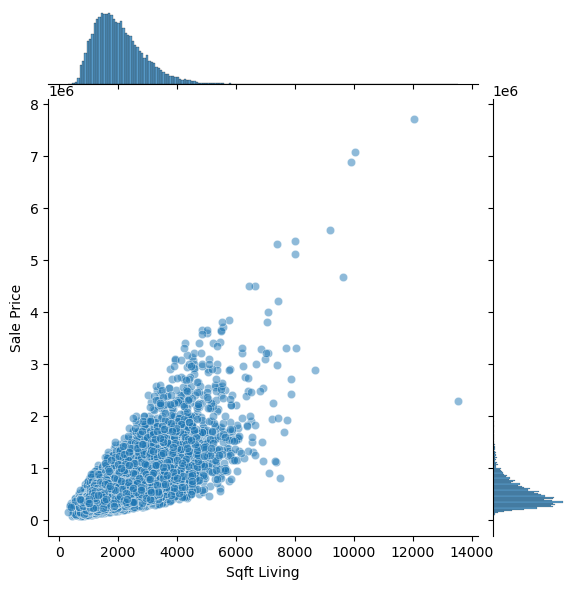

In [85]:
plt.figure(figsize=(8, 5))
sns.jointplot(x='sqft_living', y='price', data=df_USA, alpha=0.5)
plt.xlabel('Sqft Living')
plt.ylabel('Sale Price')
plt.show()


Condition counting: 
condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64


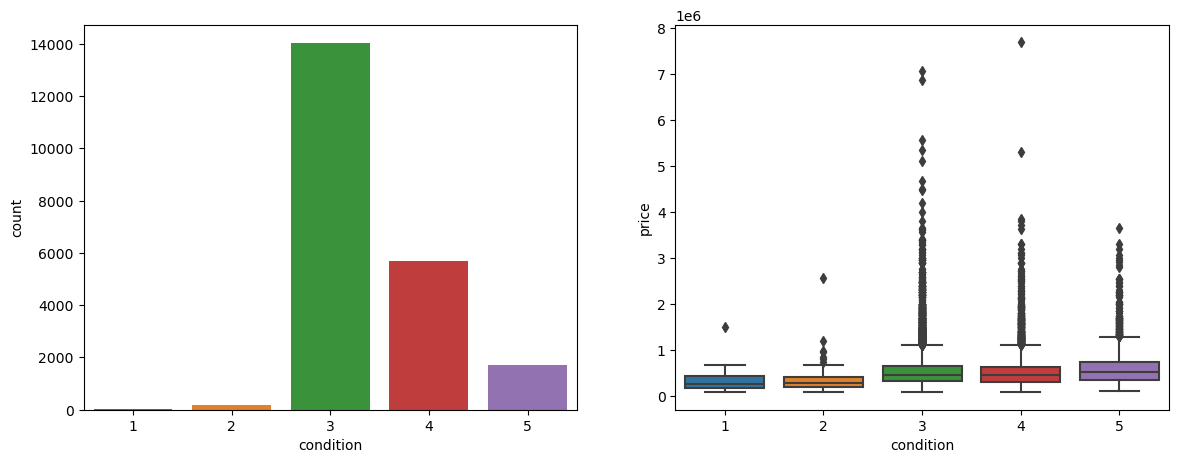

In [86]:
condition = df_USA['condition'].value_counts()

print("Condition counting: ")
print(condition)

fig, ax = plt.subplots(ncols=2, figsize=(14,5))
sns.countplot(x='condition', data=df_USA, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=df_USA, ax=ax[1])
plt.show()

<Figure size 1200x800 with 0 Axes>

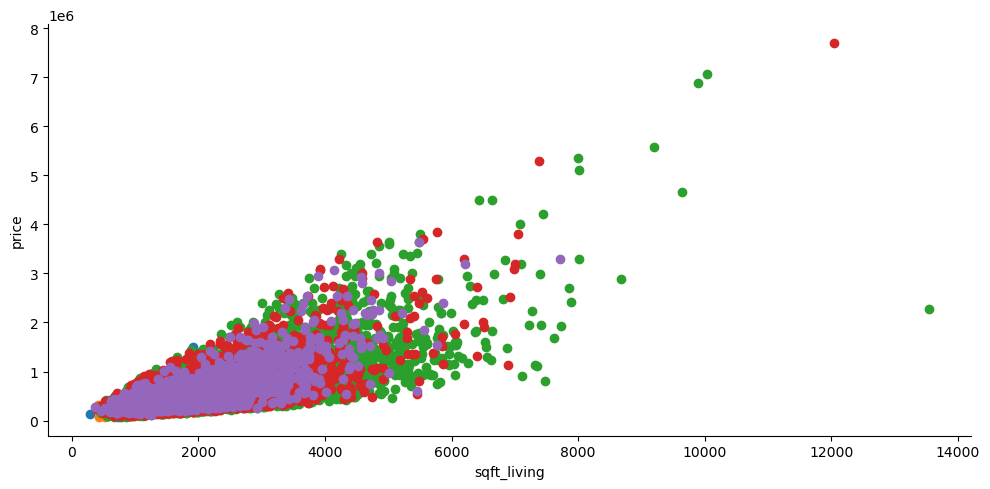

In [87]:
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data=df_USA, hue='condition', height=5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()


### Exploring bathrooms by price and condition

Freuency bathroom description:
bathrooms
2    13851
1     3933
3     2527
4     1201
5       57
6       24
0       14
8        4
7        2
Name: count, dtype: int64


C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\abudh\AppData\Local\Temp\ipykernel_20364\1171683786.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

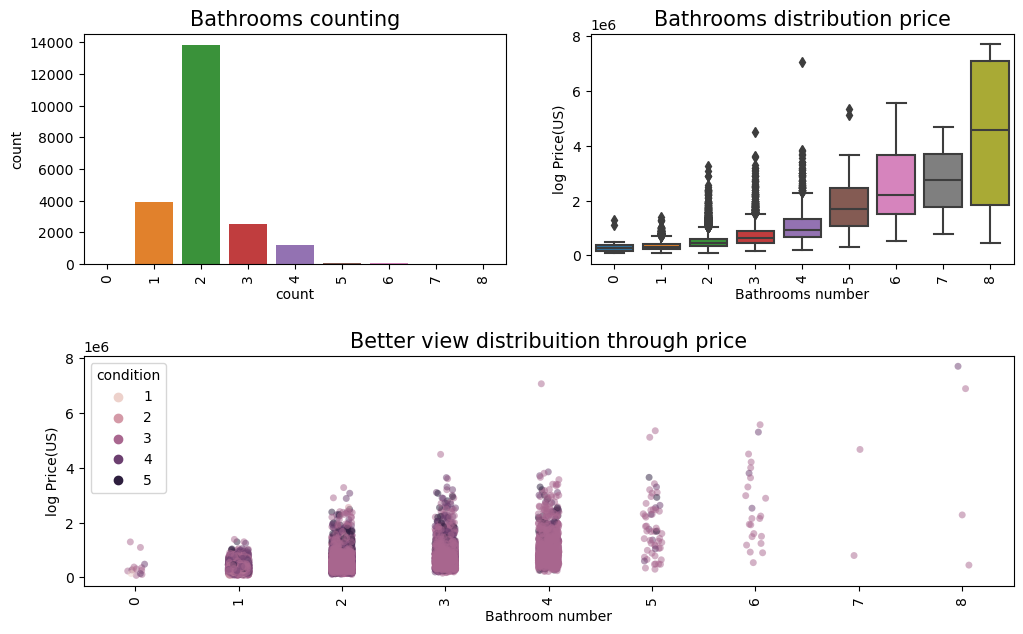

In [88]:
df_USA["bathrooms"] = df_USA['bathrooms'].round(0).astype(int)

print("Freuency bathroom description:")
print(df_USA["bathrooms"].value_counts())

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x="bathrooms", data=df_USA,
                    ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Bathrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_xlabel("count")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="bathrooms", y='price',
                  data=df_USA, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Bathrooms distribution price", fontsize=15)
ax2.set_xlabel("Bathrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.stripplot(x="bathrooms", y="price",
                    data=df_USA, alpha=0.5,
                    jitter=True, hue="condition")
ax0.set_title("Better view distribuition through price", fontsize=15)
ax0.set_xlabel("Bathroom number")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

Mean squared error: 134582326689.42


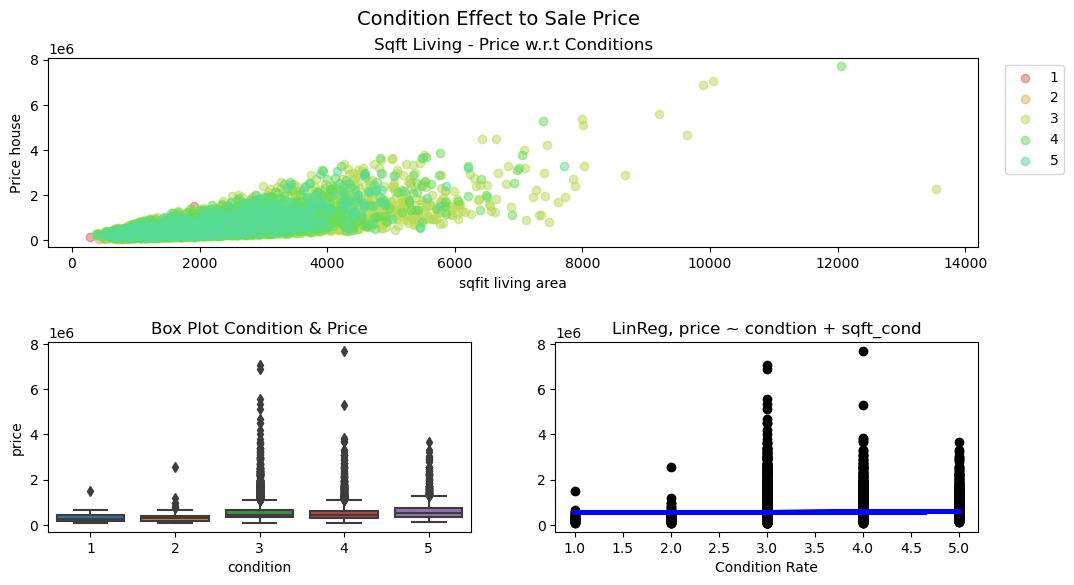

In [89]:
from cycler import cycler

plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
colors = sns.color_palette('hls', 10)
ax1.set_prop_cycle(cycler('color', colors))
for val in range(1, 6, 1):
    indeX = df_USA.condition == val
    ax1.scatter(df_USA.sqft_living.loc[indeX], df_USA.price.loc[indeX], label=val, alpha=0.5)

ax1.legend(bbox_to_anchor=[1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t Conditions')

ax2 = plt.subplot2grid((2, 2), (1, 0))
sns.boxplot(x='condition', y='price', data=df_USA, ax=ax2)
ax2.set_title('Box Plot Condition & Price', fontsize=12)

ax3 = plt.subplot2grid((2, 2), (1, 1))
cubicQual = df_USA.groupby(['condition'])['price'].mean().round(0)
testTrain = df_USA.loc[:, ['condition', 'price']].copy()
testTrain['sqCond'] = np.power(testTrain['condition'], 2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['condition', 'sqCond']], testTrain['price'])
y_pred = mdl.predict(testTrain[['condition', 'sqCond']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['condition'], testTrain['price'], color='black')
ax3.plot(testTrain['condition'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize=12)
ax3.set_xlabel('Condition Rate')
plt.subplots_adjust(hspace=0.5, top=0.9)
plt.suptitle('Condition Effect to Sale Price', fontsize=14)
plt.show()


Mean squared error: 112971203793.79


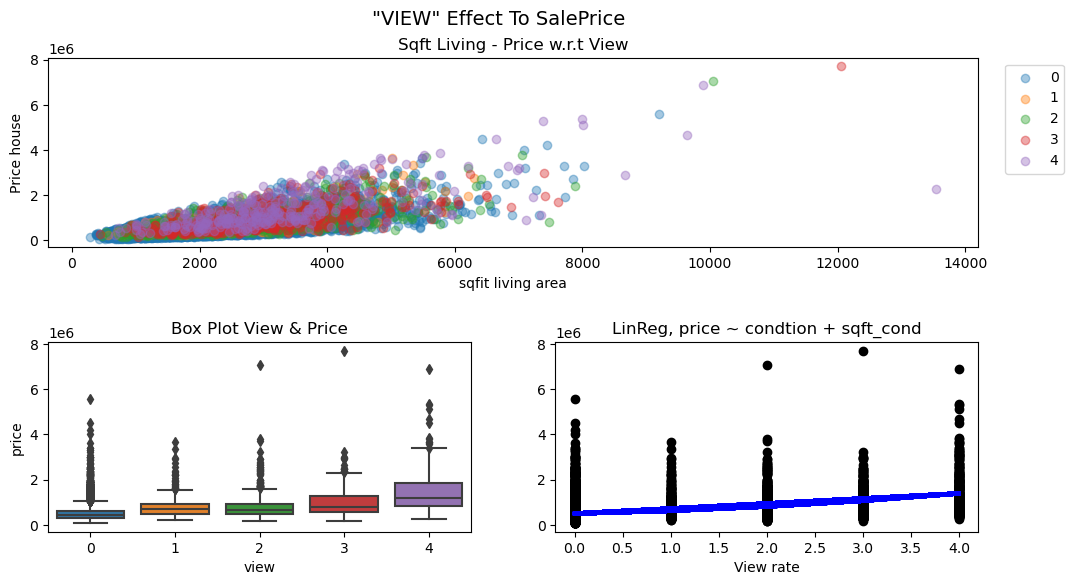

In [90]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize = (12,6))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)

for val in range(0,5,1):
    indeX = df_USA.view == val
    ax1.scatter(df_USA.sqft_living.loc[indeX], df_USA.price.loc[indeX], label = val, alpha=0.4)
ax1.legend(bbox_to_anchor = [1.1, 1])
ax1.set_xlabel('sqfit living area')
ax1.set_ylabel('Price house')
ax1.set_title('Sqft Living - Price w.r.t View')

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = 'view', y = 'price', data = df_USA, ax = ax2)
ax2.set_title('Box Plot View & Price', fontsize = 12)

ax3 = plt.subplot2grid((2,2), (1,1))
cubicV = df_USA.groupby(['view'])['price'].mean().round(0)
testTrain = df_USA.loc[:, ['view', 'price']].copy()
testTrain['sqview'] = np.power(testTrain['view'],2)
mdl = linear_model.LinearRegression()
mdl.fit(testTrain[['view', 'sqview']], testTrain['price'])
y_pred = mdl.predict(testTrain[['view', 'sqview']])
print("Mean squared error: %.2f" % mean_squared_error(y_pred, testTrain.price))
# Plot outputs
ax3.scatter(testTrain['view'], testTrain['price'],  color='black')
ax3.plot(testTrain['view'], y_pred, color='blue', linewidth=3)
ax3.set_title('LinReg, price ~ condtion + sqft_cond', fontsize = 12)
ax3.set_xlabel('View rate')
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.suptitle('"VIEW" Effect To SalePrice', fontsize = 14)
plt.show()

In [91]:
#How can I color the scatter plot by bedrooms? 

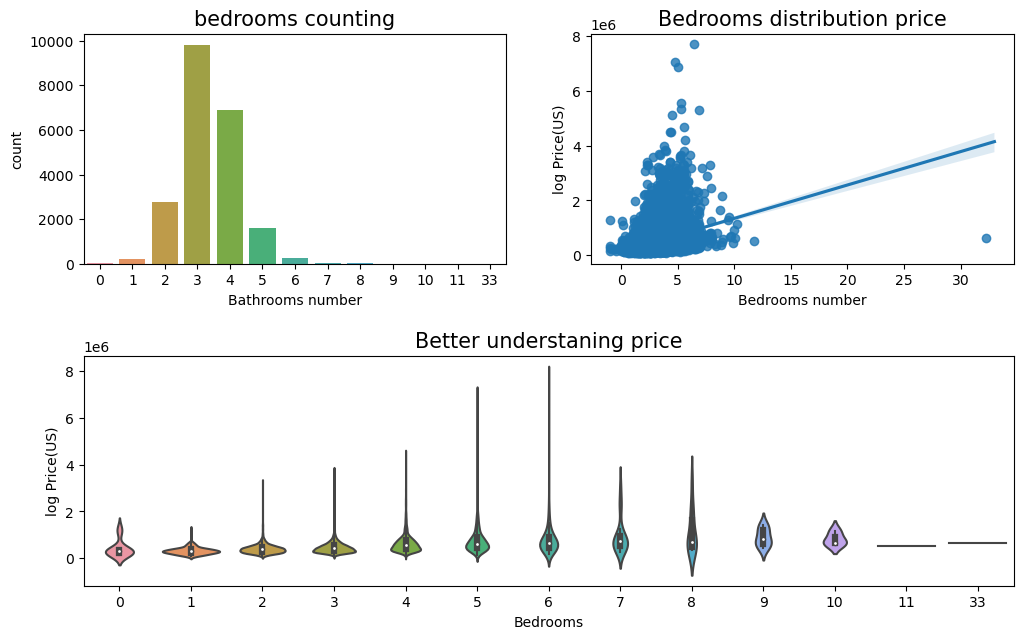

In [92]:
bedrooms = df_USA.bedrooms.value_counts()

plt.figure(figsize= (12, 8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.countplot(x ="bedrooms", data = df_USA, ax = ax1)
ax1.set_title("bedrooms counting", fontsize=15)
ax1.set_xlabel("Bathrooms number")
ax1.set_ylabel("count")


ax2 = plt.subplot(222)
ax2 = sns.regplot(x="bedrooms", y='price', 
                  data=df_USA, ax=ax2, x_jitter=True)
ax2.set_title("Bedrooms distribution price", fontsize=15)
ax2.set_xlabel("Bedrooms number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.violinplot(x="bedrooms", y="price",
                    data=df_USA)
ax0.set_title("Better understaning price", fontsize=15)
ax0.set_xlabel("Bedrooms")
ax0.set_ylabel("log Price(US)")

plt.show()

Floors counting description
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64


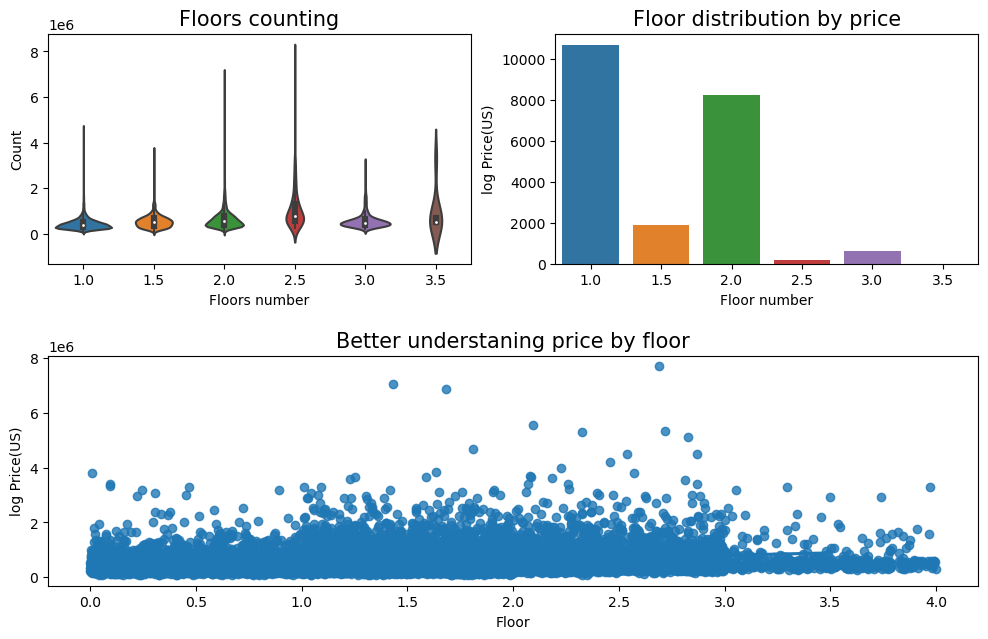

In [93]:
print("Floors counting description")
print(df_USA['floors'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.violinplot(x="floors", y='price', 
                    data=df_USA, ax=ax1, )
ax1.set_title("Floors counting", fontsize=15)
ax1.set_xlabel("Floors number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="floors",
                  data=df_USA, ax=ax2)
ax2.set_title("Floor distribution by price", fontsize=15)
ax2.set_xlabel("Floor number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="floors", y="price", #I need to change floors by sqft_living and hue bye floors
                    data=df_USA, x_jitter=True)
ax0.set_title("Better understaning price by floor", fontsize=15)
ax0.set_xlabel("Floor")
ax0.set_ylabel("log Price(US)")

plt.show()

<Figure size 1200x800 with 0 Axes>

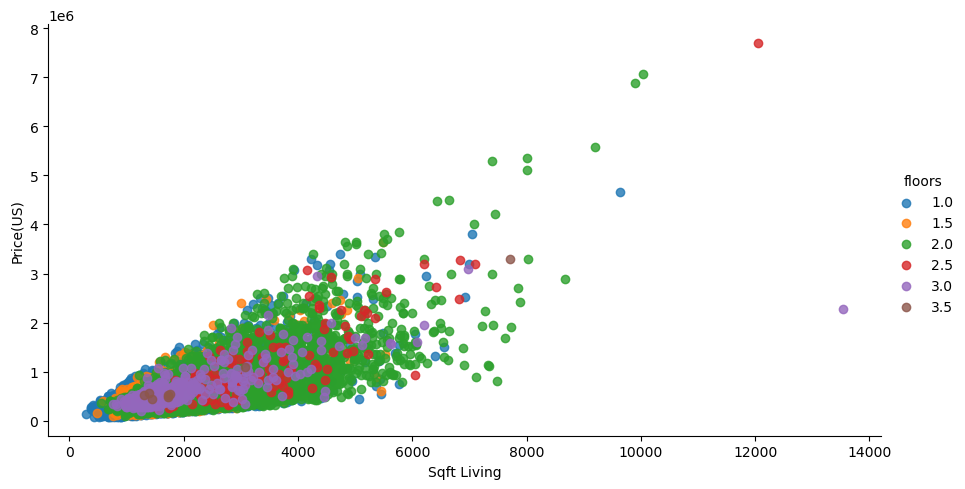

In [94]:
plt.figure(figsize = (12,8))
g=sns.lmplot(x="sqft_living", y="price", aspect=1.8,
                    data=df_USA, hue="floors", fit_reg=False)
g.set_titles("Floors by sqft_living and price", fontsize=15)
g.set_xlabels("Sqft Living")
g.set_ylabels("Price(US)")
plt.show()

Grade counting description
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64


C:\Users\abudh\AppData\Local\Temp\ipykernel_20364\877862351.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)


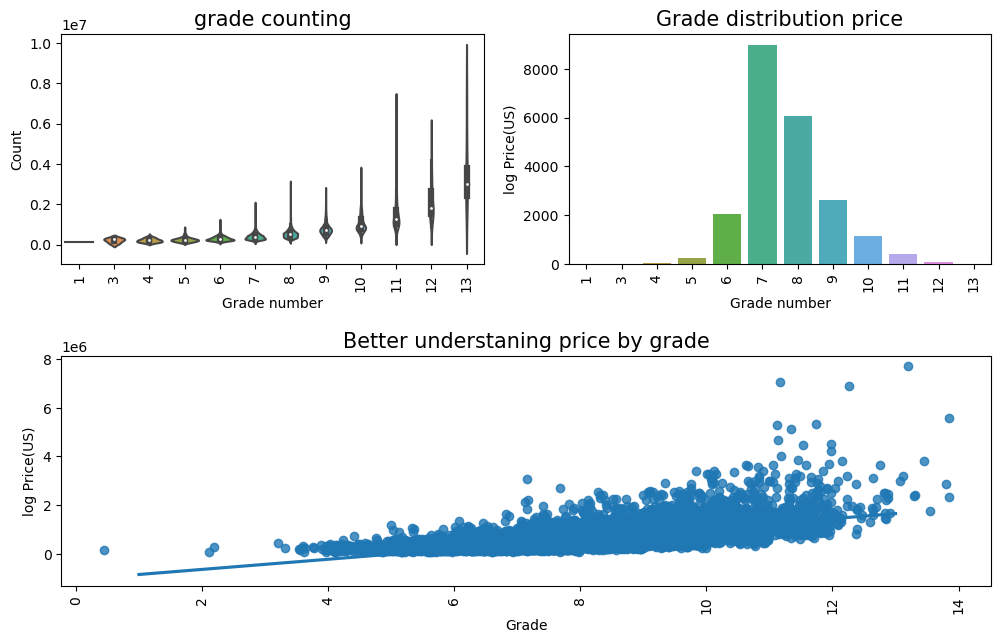

In [95]:
print("Grade counting description")
print(df_USA['grade'].value_counts())


plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

ax1 = plt.subplot(221)
ax1 = sns.violinplot(x="grade", y='price', 
                    data=df_USA, ax=ax1, )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("grade counting", fontsize=15)
ax1.set_xlabel("Grade number")
ax1.set_ylabel("Count")

ax2 = plt.subplot(222)
ax2 = sns.countplot(x="grade",
                  data=df_USA, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="grade", y="price",
                    data=df_USA, x_jitter=True)
ax0.set_title("Better understaning price by grade", fontsize=15)
ax0.set_xlabel("Grade")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)

plt.show()

In [96]:
#Clearly view of bathrooms and bedrooms correlation

bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[bath[0]], df_USA[bath[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,,
0,7,4,2,0,1,0,0,0,0,0,0,0,0
1,2,167,1587,1800,327,43,6,1,0,0,0,0,0
2,4,28,1129,7186,4709,695,90,7,1,0,1,0,1
3,0,0,41,656,1219,506,88,7,6,2,1,1,0
4,0,0,1,182,601,321,72,17,4,3,0,0,0
5,0,0,0,0,19,22,12,2,1,0,1,0,0
6,0,0,0,0,6,13,2,2,1,0,0,0,0
7,0,0,0,0,0,1,0,1,0,0,0,0,0
8,0,0,0,0,0,0,2,1,0,1,0,0,0


In [97]:
bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[bath_cond[0]], df_USA[bath_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bathrooms,,,,,
0,1,1,9,3,0
1,20,91,2211,1300,311
2,9,75,9000,3702,1065
3,0,5,1713,553,256
4,0,0,1026,109,66
5,0,0,46,8,3
6,0,0,21,3,0
7,0,0,2,0,0
8,0,0,3,1,0


In [98]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[bed_cond[0]], df_USA[bed_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


In [99]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[cond_water[0]], df_USA[cond_water[1]]).style.background_gradient(cmap = cm)

waterfront,0,1
condition,,
1,29,1
2,171,1
3,13940,91
4,5629,50
5,1681,20


In [100]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[grade_cond[0]], df_USA[grade_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


In [101]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[grade_bed[0]], df_USA[grade_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
grade,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,0,0,0
4,2,12,14,1,0,0,0,0,0,0,0,0,0
5,0,37,114,62,21,5,3,0,0,0,0,0,0
6,0,78,824,854,233,41,7,1,0,0,0,0,0
7,6,52,1205,4917,2177,501,98,11,6,4,2,1,1
8,3,14,499,2796,2194,455,90,12,4,1,0,0,0
9,0,2,78,832,1351,313,33,4,1,0,1,0,0
10,0,1,21,296,615,173,22,5,1,0,0,0,0


In [102]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_USA[grade_bath[0]], df_USA[grade_bath[1]]).style.background_gradient(cmap = cm)

bathrooms,0,1,2,3,4,5,6,7,8
grade,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0
4,0,28,1,0,0,0,0,0,0
5,1,204,36,1,0,0,0,0,0
6,2,1441,574,18,3,0,0,0,0
7,4,2104,6216,575,75,6,0,0,1
8,3,145,4788,882,244,4,2,0,0
9,0,9,1671,629,303,3,0,0,0
10,0,0,480,309,333,11,1,0,0


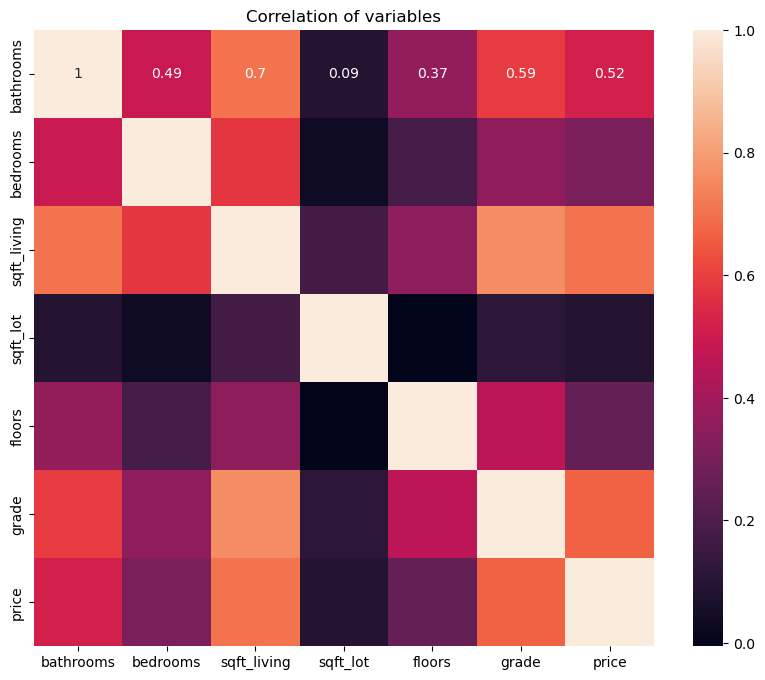

In [103]:
corr = df_USA[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

C:\Users\abudh\AppData\Local\Temp\ipykernel_20364\2338577242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_USA['yr_built'])
C:\Users\abudh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


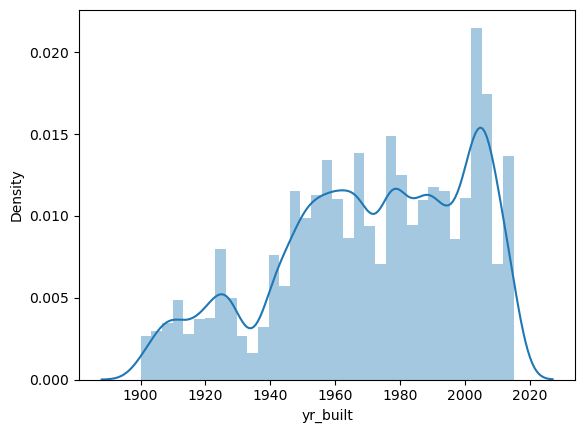

In [104]:
# Year built distribuition
sns.distplot(df_USA['yr_built'])
print(df_USA.columns)


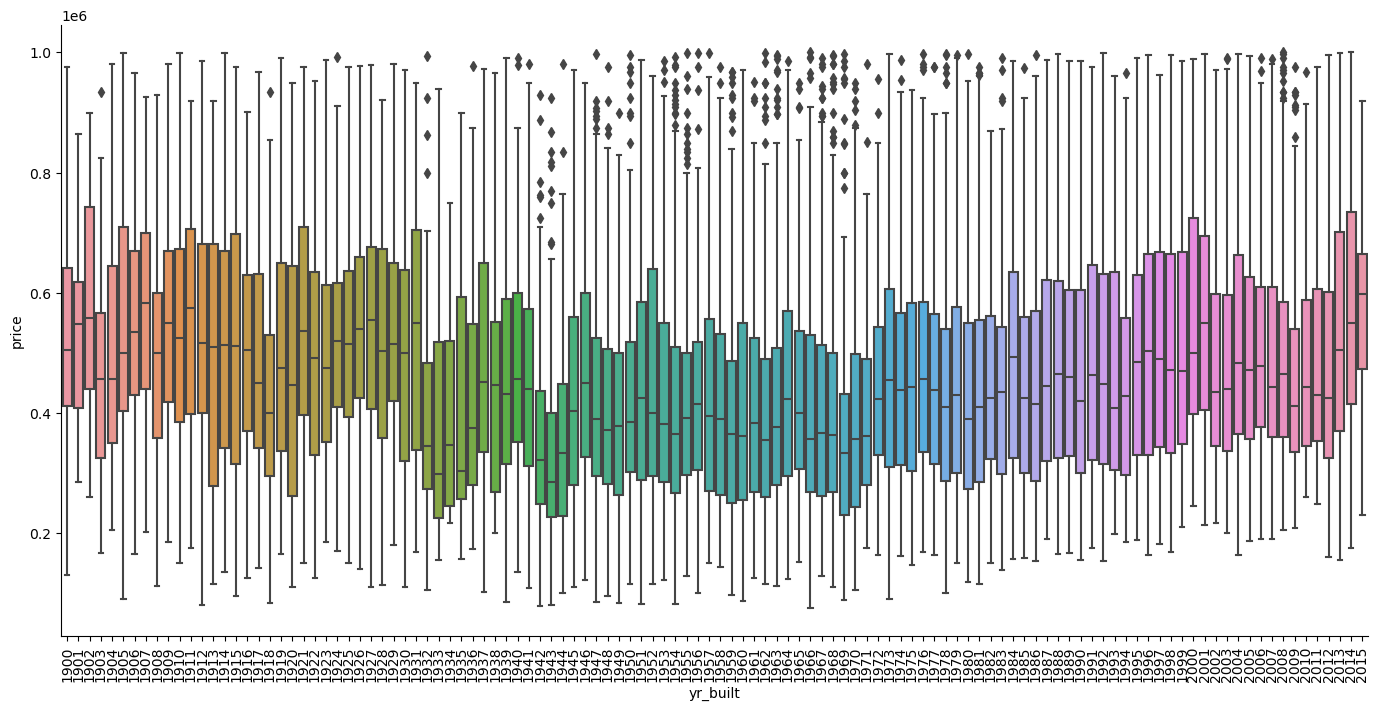

In [105]:
g = sns.catplot(x="yr_built", y="price", data=df_USA[df_USA['price'] < 1000000], 
                height=7, aspect=2, kind="box")
g.set_xticklabels(rotation=90)
plt.show()


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


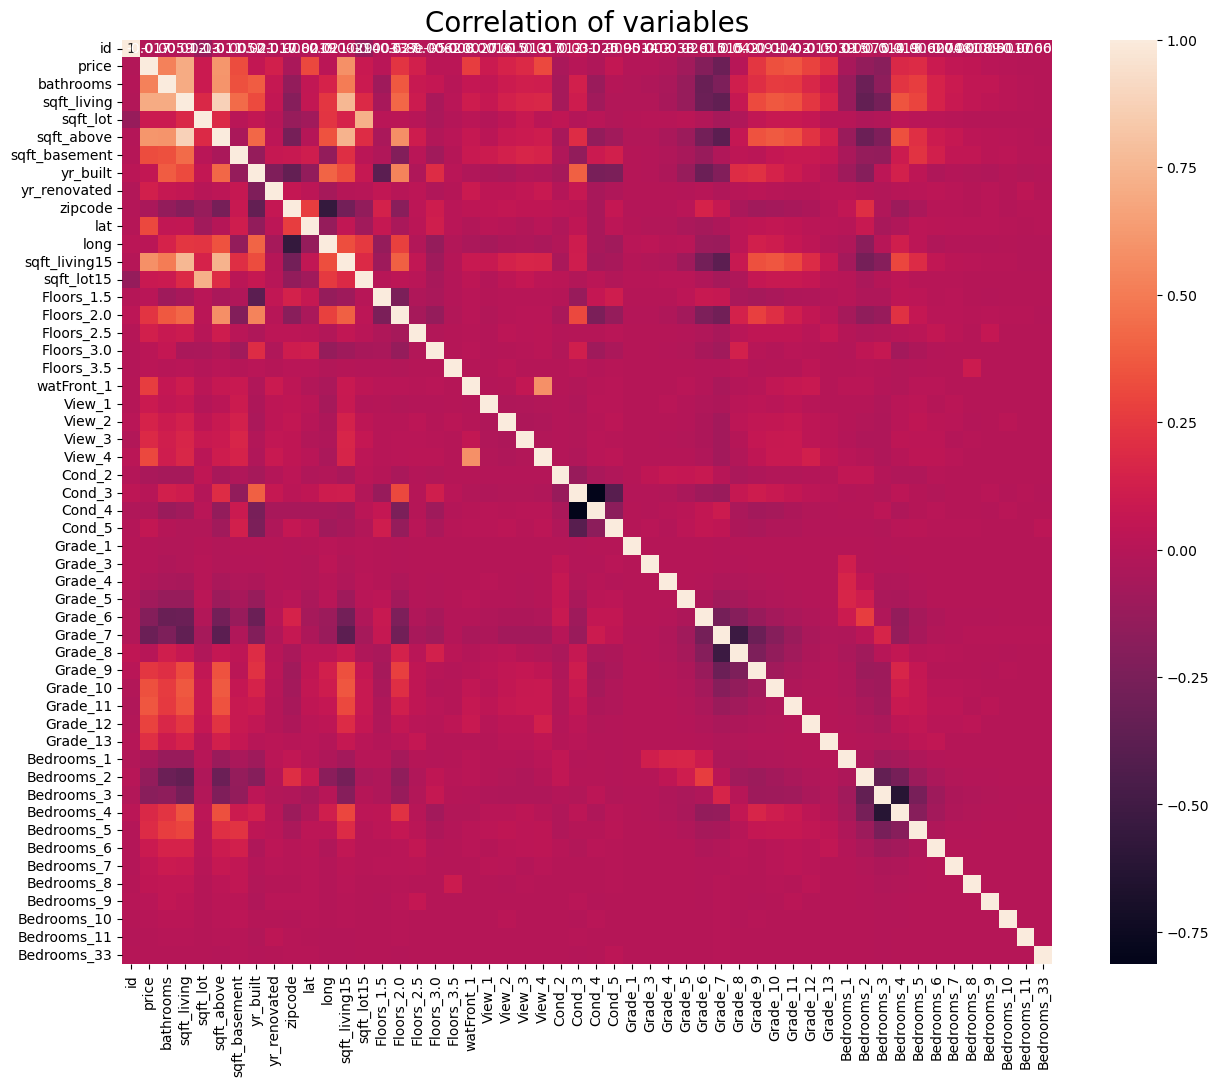

In [106]:
print(df_USA.columns)

# Generate dummy variables for the categorical columns
df_USA = df_USA.merge(pd.get_dummies(df_USA['floors'], drop_first=True, prefix='Floors'), left_index=True, right_index=True)
df_USA = df_USA.merge(pd.get_dummies(df_USA['waterfront'], drop_first=True, prefix='watFront'), left_index=True, right_index=True)
df_USA = df_USA.merge(pd.get_dummies(df_USA['view'], drop_first=True, prefix='View'), left_index=True, right_index=True)
df_USA = df_USA.merge(pd.get_dummies(df_USA['condition'], drop_first=True, prefix='Cond'), left_index=True, right_index=True)
df_USA = df_USA.merge(pd.get_dummies(df_USA['grade'], prefix='Grade'), left_index=True, right_index=True)
df_USA = df_USA.merge(pd.get_dummies(df_USA['bedrooms'], drop_first=True, prefix='Bedrooms'), left_index=True, right_index=True)

# Drop original categorical columns if they exist
cols_to_drop = ['floors', 'waterfront', 'view', 'condition', 'grade', 'bedrooms', 'date']
df_USA.drop(columns=[col for col in cols_to_drop if col in df_USA.columns], axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(15, 12))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(df_USA.corr(), vmax=1.0, annot=True)
plt.show()


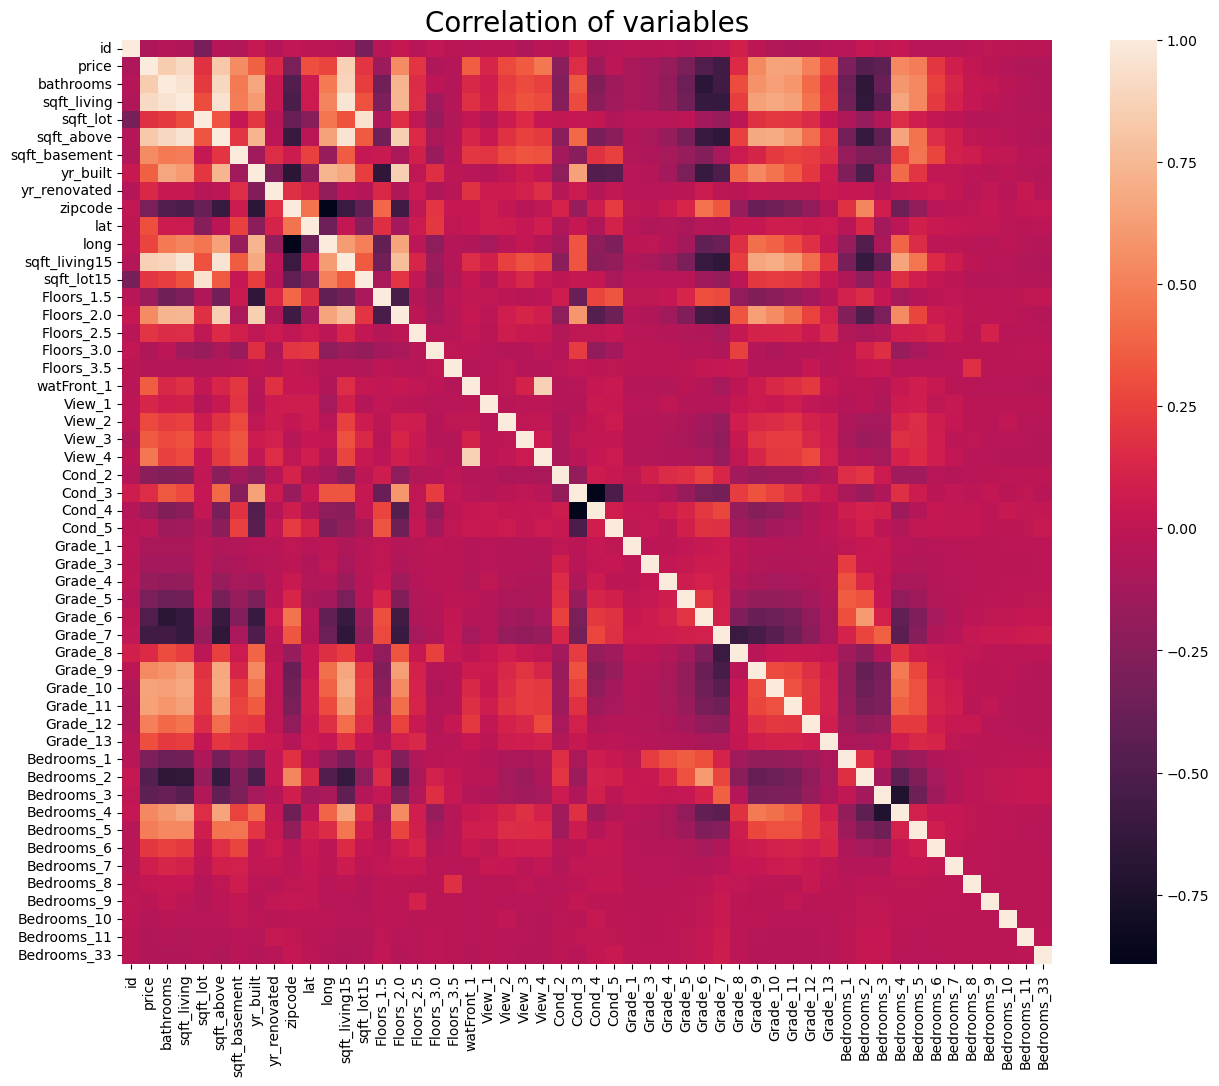

In [107]:
plt.figure(figsize=(15,12))
plt.title('Correlation of variables', fontsize=20)
sns.heatmap(df_USA.corr().astype(float).corr(),vmax=1.0)
plt.show()

In [111]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV


In [112]:

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [118]:
print(df_USA.columns)

df_USA.drop(['id'], axis=1, inplace=True)
X = df_USA.drop("price",axis=1).values
y = df_USA["price"].values

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Floors_1.5', 'Floors_2.0', 'Floors_2.5',
       'Floors_3.0', 'Floors_3.5', 'watFront_1', 'View_1', 'View_2', 'View_3',
       'View_4', 'Cond_2', 'Cond_3', 'Cond_4', 'Cond_5', 'Grade_1', 'Grade_3',
       'Grade_4', 'Grade_5', 'Grade_6', 'Grade_7', 'Grade_8', 'Grade_9',
       'Grade_10', 'Grade_11', 'Grade_12', 'Grade_13', 'Bedrooms_1',
       'Bedrooms_2', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Bedrooms_6',
       'Bedrooms_7', 'Bedrooms_8', 'Bedrooms_9', 'Bedrooms_10', 'Bedrooms_11',
       'Bedrooms_33'],
      dtype='object')


KeyError: "['id'] not found in axis"

In [116]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [117]:
thresh = 5 * 10**(-3)
model = XGBRegressor()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# eval model
select_X_val = selection.transform(X_test)
# test 
select_X_test = selection.transform(X_test)

C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_Ridge: 0.725712 (+/- 0.018061)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_Lasso: 0.681130 (+/- 0.023386)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_Elastic: 0.700078 (+/- 0.019048)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_SVR: 0.672182 (+/- 0.017383)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_RF_reg: 0.867426 (+/- 0.016470)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_ET_reg: 0.867813 (+/- 0.014920)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_BR_reg: 0.857062 (+/- 0.012807)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_Hub-Reg: 0.701502 (+/- 0.016512)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_BayRidge: 0.725819 (+/- 0.018020)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_XGB_reg: 0.874199 (+/- 0.015707)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_DT_reg: 0.709629 (+/- 0.026425)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_KNN_reg: 0.720737 (+/- 0.018464)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_Gboost-Reg: 0.857715 (+/- 0.018290)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_RFR_PCA: 0.654778 (+/- 0.035699)


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(


Scaled_XGBR_PCA: 0.601140 (+/- 0.064091)


TypeError: Neither the `x` nor `y` variable appears to be numeric.

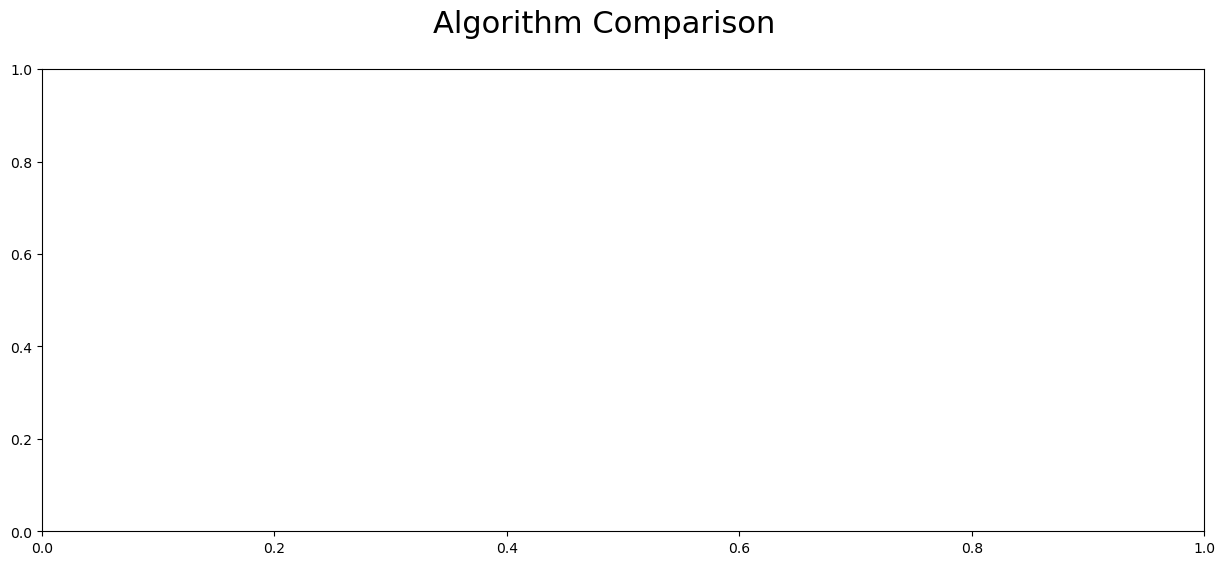

In [124]:
pipelines = []
seed = 2
from sklearn.model_selection import StratifiedKFold

pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Scaled_Elastic", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
pipelines.append(
                ("Scaled_BayRidge",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BayesianRidge())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
#pipelines.append(
#                ("Scaled_ADA-Reg",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("ADA-reg", AdaBoostRegressor())
#                 ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model in pipelines:
    kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)


# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


The initial evaluation of various regression models shows promising results, with several achieving a good 
𝑅
2
R 
2
  score above 0.80. To further improve performance, the plan is to fine-tune hyperparameters for models like RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, and XGBRegressor. This optimization process aims to enhance predictive accuracy and generalization capabilities.    

### Testing the best models
Startig by XGBREgressor


In [126]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [127]:
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [128]:
y_hat = xgb.predict(X_test)
xgb.score(X_test,y_test)


0.8967299839276387

In [129]:
# Randominzed Search in RandomForest Regressor

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [130]:
# Using Random Search to find the best Hyper Paramns
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
103 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\abudh\anaconda3\Lib\site-packag

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, verbose=2)

In [131]:
#Knowning the best params
rf_random.best_params_

{'n_estimators': 52,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [132]:
# Predicting with best params
y_hat_Search = rf_random.predict(X_test)

In [133]:
# Printing the difference between the 2 models scores
print("XGBoost Regressor R2-score: {}".format(round(r2_score(y_hat, y_test),4)))
print("RandomForest Regressor Prediction R2-score: {}".format(round(r2_score(y_hat_Search, y_test),4)))
print("\nMSE of XGBoost Regressor: {}".format(median_absolute_error(y_hat, y_test)))
print("MSE of RandomForest Regressor: {} ".format(median_absolute_error(y_hat_Search, y_test)))

XGBoost Regressor R2-score: 0.8768
RandomForest Regressor Prediction R2-score: 0.8361

MSE of XGBoost Regressor: 40163.0
MSE of RandomForest Regressor: 42184.83974358975 
